In [87]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [88]:
dataset = 'model/keypoint_classifier/temp.csv'
model_save_path = 'model/keypoint_classifier/alpha_keypoint_classifier.hdf5'

# 分類数設定

In [89]:
NUM_CLASSES = 25

# 学習データ読み込み

In [90]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (42 * 2) + 1)))

In [91]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [93]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [94]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 84)                0         
                                                                 
 dense (Dense)               (None, 20)                1700      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 25)                275       
                                                                 
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________


In [95]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [96]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [97]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
470/475 [============================>.] - ETA: 0s - loss: 2.2653 - accuracy: 0.2869
Epoch 1: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 10s 11ms/step - loss: 2.2590 - accuracy: 0.2884 - val_loss: 1.2406 - val_accuracy: 0.6683
Epoch 2/1000
471/475 [============================>.] - ETA: 0s - loss: 1.4585 - accuracy: 0.4957
Epoch 2: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 5s 10ms/step - loss: 1.4575 - accuracy: 0.4962 - val_loss: 0.9088 - val_accuracy: 0.7685
Epoch 3/1000
474/475 [============================>.] - ETA: 0s - loss: 1.2748 - accuracy: 0.5633
Epoch 3: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 1.2749 - accuracy: 0.5633 - val_loss: 0.7621 - val_accuracy: 0.8345
Epoch 4/1000
470/475 [============================>.] - ETA: 0s 

471/475 [============================>.] - ETA: 0s - loss: 0.8006 - accuracy: 0.7390
Epoch 27: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 5s 10ms/step - loss: 0.8006 - accuracy: 0.7389 - val_loss: 0.3558 - val_accuracy: 0.9233
Epoch 28/1000
475/475 [==============================] - ETA: 0s - loss: 0.8053 - accuracy: 0.7397
Epoch 28: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.8053 - accuracy: 0.7397 - val_loss: 0.3487 - val_accuracy: 0.9247
Epoch 29/1000
475/475 [==============================] - ETA: 0s - loss: 0.7987 - accuracy: 0.7431
Epoch 29: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7987 - accuracy: 0.7431 - val_loss: 0.3494 - val_accuracy: 0.9205
Epoch 30/1000
471/475 [============================>.] - ETA: 0s - loss: 0

472/475 [============================>.] - ETA: 0s - loss: 0.7591 - accuracy: 0.7547
Epoch 53: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7589 - accuracy: 0.7548 - val_loss: 0.3280 - val_accuracy: 0.9301
Epoch 54/1000
473/475 [============================>.] - ETA: 0s - loss: 0.7566 - accuracy: 0.7560
Epoch 54: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7565 - accuracy: 0.7560 - val_loss: 0.3393 - val_accuracy: 0.9193
Epoch 55/1000
469/475 [============================>.] - ETA: 0s - loss: 0.7555 - accuracy: 0.7549
Epoch 55: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7551 - accuracy: 0.7552 - val_loss: 0.3386 - val_accuracy: 0.9225
Epoch 56/1000
474/475 [============================>.] - ETA: 0s - loss: 0.

474/475 [============================>.] - ETA: 0s - loss: 0.7414 - accuracy: 0.7584
Epoch 79: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7417 - accuracy: 0.7584 - val_loss: 0.3343 - val_accuracy: 0.9187
Epoch 80/1000
472/475 [============================>.] - ETA: 0s - loss: 0.7463 - accuracy: 0.7578
Epoch 80: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7459 - accuracy: 0.7580 - val_loss: 0.3294 - val_accuracy: 0.9163
Epoch 81/1000
469/475 [============================>.] - ETA: 0s - loss: 0.7419 - accuracy: 0.7582
Epoch 81: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7426 - accuracy: 0.7580 - val_loss: 0.3353 - val_accuracy: 0.9183
Epoch 82/1000
475/475 [==============================] - ETA: 0s - loss: 0.

471/475 [============================>.] - ETA: 0s - loss: 0.7334 - accuracy: 0.7608
Epoch 105: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 5s 10ms/step - loss: 0.7334 - accuracy: 0.7609 - val_loss: 0.3371 - val_accuracy: 0.9045
Epoch 106/1000
471/475 [============================>.] - ETA: 0s - loss: 0.7398 - accuracy: 0.7610
Epoch 106: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7398 - accuracy: 0.7611 - val_loss: 0.3327 - val_accuracy: 0.9098
Epoch 107/1000
472/475 [============================>.] - ETA: 0s - loss: 0.7379 - accuracy: 0.7608
Epoch 107: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7375 - accuracy: 0.7608 - val_loss: 0.3299 - val_accuracy: 0.9148
Epoch 108/1000
475/475 [==============================] - ETA: 0s - l

473/475 [============================>.] - ETA: 0s - loss: 0.7270 - accuracy: 0.7608
Epoch 131: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7274 - accuracy: 0.7607 - val_loss: 0.3418 - val_accuracy: 0.9001
Epoch 132/1000
472/475 [============================>.] - ETA: 0s - loss: 0.7269 - accuracy: 0.7648
Epoch 132: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7264 - accuracy: 0.7650 - val_loss: 0.3300 - val_accuracy: 0.9106
Epoch 133/1000
471/475 [============================>.] - ETA: 0s - loss: 0.7174 - accuracy: 0.7665
Epoch 133: saving model to model/keypoint_classifier\alpha_keypoint_classifier.hdf5
475/475 [==============================] - 4s 9ms/step - loss: 0.7175 - accuracy: 0.7666 - val_loss: 0.3412 - val_accuracy: 0.8998
Epoch 134/1000
475/475 [==============================] - ETA: 0s - lo

In [98]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

159/159 [==============================] - 1s 5ms/step - loss: 0.3440 - accuracy: 0.8978


In [99]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [100]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 359ms/step
[9.6438058e-08 2.4718195e-02 1.6431631e-01 9.1157764e-02 3.6388338e-02
 1.6776530e-02 2.5132927e-03 4.5134813e-01 1.3974287e-03 9.2544574e-03
 1.1488403e-05 1.8913719e-03 7.3011644e-04 1.2948277e-04 1.5344502e-01
 1.7990327e-02 2.4283022e-15 2.7586181e-02 3.1589766e-04 6.6129951e-06
 2.3063467e-05 4.1932819e-15 1.7949700e-15 1.8452359e-14 1.9083764e-14]
7


# 混同行列

633/633 [==============================] - 3s 4ms/step


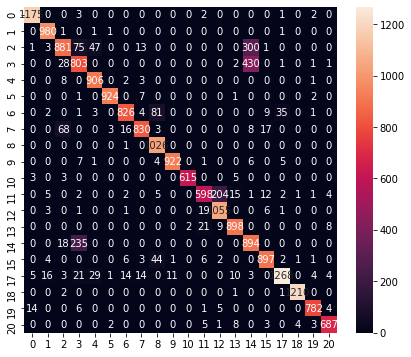

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1183
           1       0.97      1.00      0.98       984
           2       0.87      0.67      0.76      1321
           3       0.70      0.63      0.66      1266
           4       0.92      0.98      0.95       920
           5       0.99      0.99      0.99       935
           6       0.95      0.86      0.90       962
           7       0.95      0.88      0.91       945
           8       0.88      1.00      0.94      1027
           9       0.99      0.97      0.98       946
          10       1.00      0.98      0.99       626
          11       0.92      0.70      0.79       852
          12       0.83      0.97      0.89      1086
          13       0.96      0.96      0.96       938
          14       0.54      0.78      0.64      1147
          15       0.95      0.93      0.94       967
          17       0.96      0.90      0.93      1403
     

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [102]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [103]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/alpha_keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\shadow\AppData\Local\Temp\tmpkm3qfrvq\assets


5824

# 推論テスト

In [104]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [105]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [106]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [107]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 3.01 ms


In [108]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1014836e-07 2.5233619e-02 1.6137648e-01 9.1300167e-02 3.0781126e-02
 1.8925656e-02 2.4235917e-03 4.6257198e-01 8.9912751e-04 8.2300045e-03
 1.3644889e-05 2.0333074e-03 8.3058607e-04 1.5725187e-04 1.5088189e-01
 1.8305285e-02 2.8953763e-15 2.5668038e-02 3.3206260e-04 7.5269909e-06
 2.8574676e-05 5.3241124e-15 2.2082983e-15 2.0447633e-14 2.1372440e-14]
7
